In [2]:
import pandas as pd

In [3]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

In [4]:
claims = pd.read_csv(r'C:\Users\rosee\Desktop\floods analysis\openFEMA_claims20190831[1].csv')
claims.to_csv('claims.csv', encoding='utf-8')
claims.tail(10)

C:\Users\rosee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (0,11,15,22,23,31,32,37) have mixed types. Specify dtype option on import or set low_memory=False.



agriculturestructureindicator    asofdate  basefloodelevation  \
2432878                           NaN  2019-08-31               238.0   
2432879                           NaN  2019-08-31                10.0   
2432880                           NaN  2019-08-31                 NaN   
2432881                           NaN  2019-08-31                 8.0   
2432882                           NaN  2019-08-31                 8.0   
2432883                           NaN  2019-08-31                 9.0   
2432884                           NaN  2019-08-31                 9.0   
2432885                           NaN  2019-08-31                10.0   
2432886                           NaN  2019-08-31                 NaN   
2432887                           NaN  2019-08-31                 9.0   

         basementenclosurecrawlspacetype  reportedcity condominiumindicator  \
2432878                              0.0  LIBERTY HILL                    N   
2432879                              0.0         MIAMI                    N   
2432880                              0.0   COOPER CITY                    N   
2432881                              0.0         MIAMI                    N   
2432882                              0.0         MIAMI                    N   
2432883                              0.0         MIAMI                    N   
2432884                              0.0         MIAMI                    N   
2432885                              0.0     PINECREST                    N   
2432886                              0.0     PINECREST                    N   
2432887                              0.0         MIAMI                    N   

         policycount  countycode  crsdiscount  dateofloss  ...  \
2432878          1.0     45055.0         0.05  2015-12-31  ...   
2432879          1.0     12086.0         0.25  2005-08-25  ...   
2432880          1.0     12011.0         0.10  2003-06-23  ...   
2432881          1.0     12086.0         0.25  2005-08-26  ...   
2432882          1.0     12086.0         0.25  2005-08-26  ...   
2432883          1.0     12086.0         0.25  2005-08-26  ...   
2432884          1.0     12086.0         0.25  2005-08-25  ...   
2432885          1.0     12086.0         0.25  2005-06-20  ...   
2432886          1.0     12086.0         0.25  2005-08-25  ...   
2432887          1.0     12086.0         0.25  2005-08-25  ...   

        amountpaidonincreasedcostofcomplianceclaim  \
2432878                                        NaN   
2432879                                        0.0   
2432880                                        0.0   
2432881                                        0.0   
2432882                                        0.0   
2432883                                        0.0   
2432884                                        0.0   
2432885                                        0.0   
2432886                                        0.0   
2432887                                        0.0   

        postfirmconstructionindicator  ratemethod  \
2432878                             Y           1   
2432879                             Y           1   
2432880                             Y           1   
2432881                             Y           1   
2432882                             Y           1   
2432883                             Y           1   
2432884                             Y           1   
2432885                             N           1   
2432886                             N           1   
2432887                             N           1   

         smallbusinessindicatorbuilding state totalbuildinginsurancecoverage  \
2432878                             NaN    SC                       250000.0   
2432879                             NaN    FL                       156000.0   
2432880                             NaN    FL                        27200.0   
2432881                             NaN    FL                       160700.0   
2432882                     

In [205]:
claims.shape

(2432888, 39)

In [6]:
claims.dtypes
#will need to convert date of loss to datetime
#I can drop asofdate because it doesn't matter and is constant

agriculturestructureindicator                  object
asofdate                                       object
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
reportedcity                                   object
condominiumindicator                           object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
dateofloss                                     object
elevatedbuildingindicator                      object
elevationcertificateindicator                  object
elevationdifference                           float64
censustract                                   float64
floodzone                                      object
houseworship                                   object
latitude                                      float64
locationofcontents                             object
longitude                   

In [7]:
claims['yearofloss'].value_counts().sort_values(ascending=False)

#the top ten are not very random, they are more recent years

2005    277024
2012    175789
2017    145466
2008     96972
2011     96461
1979     87375
2016     85463
1998     83621
1995     79582
2004     76033
1983     70474
1999     68191
1996     68137
1992     61551
2001     54492
1980     53227
1985     52339
1989     48696
2003     47846
1993     45979
1982     43118
2018     42429
1984     39236
1997     38162
2010     37818
2009     37733
1991     36599
1978     35897
2015     34577
2002     34512
1981     31178
2006     29651
1994     28634
2007     28360
2013     24060
2000     23255
2019     19299
1990     19266
1987     18992
1986     18863
2014     18774
1988     11949
1977      5667
1976        72
1975        45
1974        13
1973         9
1972         1
1970         1
Name: yearofloss, dtype: int64

In [8]:
claims['state'].value_counts()

LA    458785
TX    371422
FL    295451
NJ    192679
NY    169501
NC    101247
PA     73523
MS     62715
IL     51837
CA     50294
MO     50062
VA     49270
SC     45728
AL     40599
MA     34406
CT     28120
WV     27313
OH     27250
PR     25603
KY     24475
MD     23870
GA     21398
IN     18705
TN     15425
IA     14341
WA     14029
ND     13209
MI     12970
OK     12684
MN     12139
AR      9523
WI      8463
KS      7693
RI      6581
NE      6161
DE      6055
OR      5827
HI      5391
CO      5275
AZ      4946
ME      4673
NH      3985
SD      3649
VI      3537
VT      2816
MT      2103
NV      1851
NM      1372
ID      1074
UT      1060
AK       666
WY       544
DC       412
GU       159
AS        10
Name: state, dtype: int64

In [9]:
claims.describe().T

#I can't use all 2.4 million data, so I will compare these to the sample
#to ensure that my sample really is random

count          mean  \
basefloodelevation                           483589.0  7.137891e+01   
basementenclosurecrawlspacetype             2432843.0  4.672303e-01   
policycount                                 2432880.0  1.247610e+00   
countycode                                  2425385.0  3.020189e+04   
crsdiscount                                 2432880.0  3.494819e-02   
elevationdifference                         2432880.0  7.505239e+02   
censustract                                 2373588.0  3.004539e+10   
latitude                                    2379340.0  3.404449e+01   
longitude                                   2379340.0 -8.614260e+01   
lowestadjacentgrade                          350723.0  7.545709e+01   
lowestfloorelevation                         475071.0  1.482986e+02   
numberoffloorsintheinsuredbuilding          2416237.0  1.722882e+00   
occupancytype                               2432168.0  1.404049e+00   
amountpaidonbuildingclaim                   2359510.0  2.367499e+04   
amountpaidoncontentsclaim                   1712987.0  7.729023e+03   
amountpaidonincreasedcostofcomplianceclaim  1160371.0  7.600233e+02   
totalbuildinginsurancecoverage              2432880.0  1.512794e+05   
totalcontentsinsurancecoverage              2432880.0  2.819080e+04   
yearofloss                                  2432888.0  2.000633e+03   

                                                     std       min  \
basefloodelevation                          3.005833e+02  -6002.00   
basementenclosurecrawlspacetype             9.312251e-01      0.00   
policycount                                 6.239860e+00      1.00   
countycode                                  1.456152e+04   1001.00   
crsdiscount                                 6.239606e-02      0.00   
elevationdifference                         4.321235e+02  -1987.00   
censustract                                 1.445356e+10   1003.00   
latitude                                    5.801293e+00    -14.30   
longitude                                   1.111013e+01   -170.70   
lowestadjacentgrade                         5.465743e+02  -3411.00   
lowestfloorelevation                        9.801414e+02  -6002.00   
numberoffloorsintheinsuredbuilding          8.858817e-01      1.00   
occupancytype                               9.672842e-01      1.00   
amountpaidonbuildingclaim                   5.278161e+04 -29207.05   
amountpaidoncontentsclaim                   2.280169e+04  -8484.00   
amountpaidonincreasedcostofcomplianceclaim  4.441656e+03      0.00   
totalbuildinginsurancecoverage              2.777121e+06      0.00   
totalcontentsinsurancecoverage              4.809394e+04      0.00   
yearofloss                                  1.179710e+01   1970.00   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  2.201900e+04  2.916300e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         9.990000e+02  9.990000e+02   
censustract                                 2.201900e+10  2.912796e+10   
latitude                                    2.990000e+01  3.190000e+01   
longitude                                  -9.140000e+01 -8.750000e+01   
lowestadjacentgrade                         3.200000e+00  6.700000e+00   
lowestfloorelevation                        6.500000e+00  1.030000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   1.085800e+02  4.818810e+03   
amountpaidoncontentsclaim                   0.000000e+00  2.290000e+02   
amountpaidonincreasedcostofcomplianceclaim

In [10]:
#I am not sure how much my computer can handle, so I am 
#gonna start on the larger side and take out 250,000 for the sample

#that was way too much, could not make bar charts. Taking it down to 100k

#still too much, 50k

#after getting some horrible results with a time based split
#I decided to focus on one state only, and I happen to live in 
#Florida, which has the third most claims out of them all 

In [210]:
sclaims = claims[(claims['state'] == 'FL')].sample(n=50000, random_state=2)

In [106]:
print(sclaims.shape)
sclaims.head(10)

(50000, 39)


agriculturestructureindicator    asofdate  basefloodelevation  \
784326                            NaN  2019-08-31                 NaN   
1870558                           NaN  2019-08-31                 NaN   
172512                            NaN  2019-08-31                 NaN   
371540                            NaN  2019-08-31                 1.0   
114392                            NaN  2019-08-31                 NaN   
1384738                           NaN  2019-08-31                 NaN   
56632                             NaN  2019-08-31                11.0   
378082                            NaN  2019-08-31                 6.0   
1606162                           NaN  2019-08-31                 7.0   
80980                             NaN  2019-08-31                 NaN   

         basementenclosurecrawlspacetype   reportedcity condominiumindicator  \
784326                               0.0    PALM HARBOR                    N   
1870558                              0.0     BOCA RATON                    N   
172512                               0.0         NAPLES                    N   
371540                               0.0  PENSACOLA BCH                    N   
114392                               0.0          MIAMI                    N   
1384738                              0.0      HOMESTEAD                    N   
56632                                0.0      ENGLEWOOD                    N   
378082                               0.0     VERO BEACH                    N   
1606162                              0.0          MIAMI                    N   
80980                                0.0      MIAMI  FL                    N   

         policycount  countycode  crsdiscount  dateofloss  ...  \
784326           1.0     12103.0         0.00  1993-03-13  ...   
1870558          1.0     12099.0         0.00  1979-04-25  ...   
172512           1.0     12021.0         0.00  2017-09-10  ...   
371540           1.0     12033.0         0.10  2004-09-15  ...   
114392           1.0     12086.0         0.10  2000-10-03  ...   
1384738          1.0     12086.0         0.00  2005-08-29  ...   
56632            1.0     12115.0         0.10  2003-08-11  ...   
378082           1.0     12061.0         0.10  2004-09-05  ...   
1606162          1.0     12086.0         0.15  2000-10-03  ...   
80980            1.0     12086.0         0.10  2000-10-03  ...   

        amountpaidonincreasedcostofcomplianceclaim  \
784326                                         NaN   
1870558                                        NaN   
172512                                         NaN   
371540                                         NaN   
114392                                         0.0   
1384738                                        0.0   
56632                                          NaN   
378082                                         0.0   
1606162                                        0.0   
80980                                          0.0   

        postfirmconstructionindicator  ratemethod  \
784326                              Y           1   
1870558                             N           1   
172512                              Y         NaN   
371540                              N           1   
114392                              N           1   
1384738                             Y           1   
56632                               Y           1   
378082                              N           1   
1606162                             Y           1   
80980                               N           1   

         smallbusinessindicatorbuilding state totalbuildinginsurancecoverage  \
784326                              NaN    FL                       122200.0   
1870558                             NaN    FL                         3600.0   
172512                                N    FL                        75000.0   
371540                              NaN    FL                            0.0   
114392           

In [107]:
sclaims.describe().T

#comparing the mean of the sample vs original, the fluctuations seem reasonable,
#this seems like a fine sample

count          mean  \
basefloodelevation                          17193.0  1.302803e+01   
basementenclosurecrawlspacetype             50000.0  1.092200e-01   
policycount                                 50000.0  2.157120e+00   
countycode                                  49907.0  1.207079e+04   
crsdiscount                                 50000.0  7.477400e-02   
elevationdifference                         50000.0  5.536475e+02   
censustract                                 49405.0  1.206371e+10   
latitude                                    49427.0  2.744190e+01   
longitude                                   49427.0 -8.208980e+01   
lowestadjacentgrade                         11415.0  1.718208e+01   
lowestfloorelevation                        16885.0  6.045879e+01   
numberoffloorsintheinsuredbuilding          49853.0  1.529858e+00   
occupancytype                               49989.0  1.444798e+00   
amountpaidonbuildingclaim                   48424.0  1.507514e+04   
amountpaidoncontentsclaim                   38569.0  4.425322e+03   
amountpaidonincreasedcostofcomplianceclaim  20347.0  2.602260e+02   
totalbuildinginsurancecoverage              50000.0  2.963028e+05   
totalcontentsinsurancecoverage              50000.0  3.674782e+04   
yearofloss                                  50000.0  2.001222e+03   

                                                     std      min  \
basefloodelevation                          4.419452e+01    -14.0   
basementenclosurecrawlspacetype             4.780121e-01      0.0   
policycount                                 1.467449e+01      1.0   
countycode                                  3.641550e+01  12001.0   
crsdiscount                                 8.152473e-02      0.0   
elevationdifference                         4.956682e+02   -953.0   
censustract                                 2.995860e+08  12015.0   
latitude                                    1.870144e+00     24.5   
longitude                                   2.187302e+00    -87.5   
lowestadjacentgrade                         2.715189e+02     -7.4   
lowestfloorelevation                        6.817433e+02     -7.0   
numberoffloorsintheinsuredbuilding          8.895383e-01      1.0   
occupancytype                               9.862717e-01      1.0   
amountpaidonbuildingclaim                   4.910697e+04      0.0   
amountpaidoncontentsclaim                   1.516838e+04      0.0   
amountpaidonincreasedcostofcomplianceclaim  2.546537e+03      0.0   
totalbuildinginsurancecoverage              2.291882e+06      0.0   
totalcontentsinsurancecoverage              5.119392e+04      0.0   
yearofloss                                  1.013389e+01   1975.0   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  8.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  1.203300e+04  1.208600e+04   
crsdiscount                                 0.000000e+00  5.000000e-02   
elevationdifference                         2.000000e+00  9.990000e+02   
censustract                                 1.203300e+10  1.208601e+10   
latitude                                    2.590000e+01  2.710000e+01   
longitude                                  -8.270000e+01 -8.150000e+01   
lowestadjacentgrade                         4.700000e+00  7.000000e+00   
lowestfloorelevation                        7.800000e+00  9.400000e+00   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   0.000000e+00  1.663030e+03   
amountpaidoncontentsclaim                   0.000000e+00  0.000000e+00   
amountpaidonincreasedcostofcomplianceclaim  0.000000e+00  0.000000e+00   
totalbuildinginsurancecove

In [14]:
# I am choosing betweeen the following features as targets
#I cannot prove the existence of global warming here,
#but what I am trying to prove is that this dataset holds evidence of global warming,
#as flooding (and therefore FEMA claims) have been increasing in recent years

#reading FEMA website for domain knowledge

#confident
#amountpaidonbuildingclaim
#amount of $ paid for building damage after flood
#this may be the most direct way to measure worsening flooding, since there is no
#higher water mark feature

#no
#amountpaidoncontentsclaim
#amount $ paid for damage to belongings after flood
#this probably isn't a great metric since the value of belongings 
#has probably shifted a lot since the 70s

#no
#amountpaidonincreasedcostofcomplainceclaim
#this is extra $ given (up to 30k) to make improvements to the building
#in order to continue receiving flood insurance
#because the building has been severely damaged or 25% of value has been damaged 
#by flood more than twice in a decade
#I wonder if this has increased in recent years due to there being increased flood zones
#this may cause leakage if it isn't target
#won't work because it seems they have a cap

#no
#totalbuildinginsurancecoverage
#the dollar amount of insurance on the building
#this probably has increased for someone who is living near
#a rising flood zone
#conservative people may take out less than they should

#no
#totalcontentsinsurancecoverage
#dollar amount of insurance on belongings
#again this probably isn't the best measure
#conservative people may take out less than they should

#confident
#basefloodelevation
#elevation at which there is a %1 chance of flooding/year
#this may be a good way to show floodplains expanding
#but there is a ten year period that is mysteriously absent

In [108]:
sclaims['totalbuildinginsurancecoverage'].value_counts()

250000.0     9063
0.0          1576
100000.0     1303
200000.0      924
500000.0      921
             ... 
233300.0        1
308000.0        1
2327200.0       1
262600.0        1
155300.0        1
Name: totalbuildinginsurancecoverage, Length: 3426, dtype: int64

In [109]:
sclaims['basefloodelevation'].describe()

count    17193.000000
mean        13.028029
std         44.194518
min        -14.000000
25%          7.000000
50%          8.000000
75%         10.000000
max       1419.000000
Name: basefloodelevation, dtype: float64

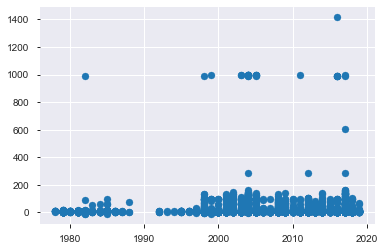

In [110]:
plt.scatter(sclaims['yearofloss'], sclaims['basefloodelevation'])

<BarContainer object of 50000 artists>

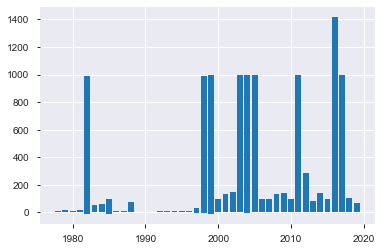

In [111]:
plt.bar(sclaims['yearofloss'], sclaims['basefloodelevation'])

<BarContainer object of 50000 artists>

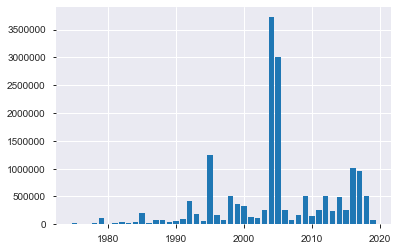

In [112]:
plt.bar(sclaims['yearofloss'], sclaims['amountpaidonbuildingclaim'])

<BarContainer object of 50000 artists>

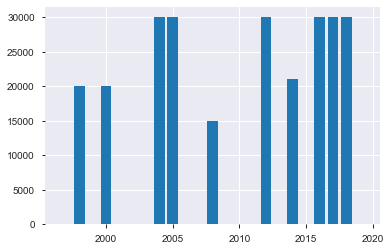

In [113]:
plt.bar(sclaims['yearofloss'], sclaims['amountpaidonincreasedcostofcomplianceclaim'])

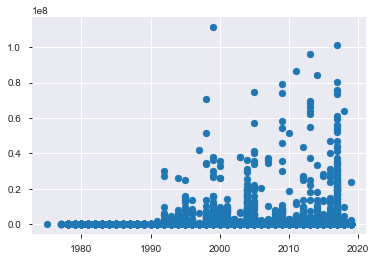

In [114]:
plt.scatter(sclaims['yearofloss'], sclaims['totalbuildinginsurancecoverage'])

#there does seem to be a pretty steady rise, lets see
#if that holds up after the split

In [115]:
sclaims['yearofloss'].max()
#just wanted to make sure

2019

In [116]:
sclaims.head(1).T

#just want to get a visual of a single row

784326
agriculturestructureindicator                       NaN
asofdate                                     2019-08-31
basefloodelevation                                  NaN
basementenclosurecrawlspacetype                       0
reportedcity                                PALM HARBOR
condominiumindicator                                  N
policycount                                           1
countycode                                        12103
crsdiscount                                           0
dateofloss                                   1993-03-13
elevatedbuildingindicator                             Y
elevationcertificateindicator                       NaN
elevationdifference                                   1
censustract                                  1.2103e+10
floodzone                                            VE
houseworship                                        NaN
latitude                                           28.1
locationofcontents                                  NaN
longitude                                         -82.8
lowestadjacentgrade                                 NaN
lowestfloorelevation                                NaN
numberoffloorsintheinsuredbuilding                    1
nonprofitindicator                                  NaN
obstructiontype                                      10
occupancytype                                         1
originalconstructiondate                     1980-01-01
originalnbdate                               1989-06-03
amountpaidonbuildingclaim                             0
amountpaidoncontentsclaim                           NaN
amountpaidonincreasedcostofcomplianceclaim          NaN
postfirmconstructionindicator                         Y
ratemethod                                            1
smallbusinessindicatorbuilding                      NaN
state                                                FL
totalbuildinginsurancecoverage                   122200
totalcontentsinsurancecoverage                        0
yearofloss                                         1993
reportedzipcode                                   34683
primaryresidence                                    NaN

In [117]:
(sclaims['amountpaidonbuildingclaim'] == 0).value_counts()
#a good portion of my claims haven't actually been given
# $ towards repairing the building after a flood
#23.7% 
#I wonder why... did they file a claim for their belongings instead?
#maybe they filed a claim and it was rejected

False    31280
True     18720
Name: amountpaidonbuildingclaim, dtype: int64

In [118]:
59347/250000

0.237388

In [119]:
(sclaims['amountpaidoncontentsclaim'] == 0).value_counts()
#even more didn't file for contents
#33.7%

False    26978
True     23022
Name: amountpaidoncontentsclaim, dtype: int64

In [120]:
84276/250000

0.337104

In [121]:
#lets take a look
!pip install pandas-profiling==2.*

import pandas_profiling

profile_report = sclaims.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

profile_report

In [29]:
#for these I am referencing the instructions and metadata excel file that gives
#a description of each feature, and/or looking at the FEMA website

#agriculturalstructureindicator has so many 0s because 0 means not ag building
#probably drop
#amountpaidonbuildings claim is real fucked up, I need to figure that out
#amountpaidoncontentsclaim same story
#amountpaidonincreasedcostofcomplianceclaim these 0s are probably just people who didn't use this
#asofdate drop this
#basefloodelevation these 0s are valid and should not be removed
#basementenclosurecrawlspacetype 0 means no crawlspace
#censustract not sure why these are missing, probably newer stuff that wasn't on the last census
#condominiumindicator there shouldn't be 0s here
#crsdiscount 0s mean no discount
#dateofloss needs datetime
#elevatedbuildingindicator shoud not have 0s
#elevationcertificateindicatorjust says whether or not elevation has been certified, unnecessary
#elevationdifference these 0s are fine
#floodzone def should keep all these categoricals
#houseofworship is useless and should be dropped
#latitude and longitude should not have 0s, these rows should be dropped
#locationofcontents is not gonna help the model, but the 0s are fine. prob should drop
#lowestadjacentgade the 0s probably mean this data wasn't collected, should drop
#lowestfloorelevation should be skewed, shouldn't have missing values.
#nonprofitindicator should be dropped
#obstructiontype is useless for my model, should drop
##original construction date is probably not useful for model
#originalnbdate needs datetime
#policycount the skew makes sense as most people insure one residence
#postfirmconstructionindicator is probably useless, should drop
#primaryresidence shouldn't have so many zeros, is useless, should drop
#ratemethod should impute values, may be useful
#reportedcity as useful as this is, it will take a lot of work to turn this into something I can use,
#should drop it for now
#reportedzipcode should drop
#reportedstate keep and encode 
#smallbusinessindicator is useless, should drop
#totalbuildinginsurancecoverage wonder why people wouldn't get building ins, maybe just contents? 
#maybe they are incomplete or cancelled accounts
#totalcontentsinsurancecoverage these 0s mean they didn't ensure their stuff

In [122]:
#dateofloss to datetime

sclaims['dateofloss'] = pd.to_datetime(sclaims['dateofloss'])

In [123]:
begin_cutoff = pd.to_datetime('01-01-1988')
end_cutoff = pd.to_datetime('12-31-1996')

In [124]:
#I wanted to see if there was any other differences for these years
#I really wanted to use this as my target but I don't think that loosing 8 years of data is worth it
#I will try calling them tomorrow and just continue cleaning data today 
basefloodelevation_gap = (sclaims.dateofloss >= begin_cutoff) & (sclaims.dateofloss <= end_cutoff)

In [125]:
basefloodelevation_gap = sclaims.loc[basefloodelevation_gap]

In [126]:
sclaims.describe().T

count          mean  \
basefloodelevation                          17193.0  1.302803e+01   
basementenclosurecrawlspacetype             50000.0  1.092200e-01   
policycount                                 50000.0  2.157120e+00   
countycode                                  49907.0  1.207079e+04   
crsdiscount                                 50000.0  7.477400e-02   
elevationdifference                         50000.0  5.536475e+02   
censustract                                 49405.0  1.206371e+10   
latitude                                    49427.0  2.744190e+01   
longitude                                   49427.0 -8.208980e+01   
lowestadjacentgrade                         11415.0  1.718208e+01   
lowestfloorelevation                        16885.0  6.045879e+01   
numberoffloorsintheinsuredbuilding          49853.0  1.529858e+00   
occupancytype                               49989.0  1.444798e+00   
amountpaidonbuildingclaim                   48424.0  1.507514e+04   
amountpaidoncontentsclaim                   38569.0  4.425322e+03   
amountpaidonincreasedcostofcomplianceclaim  20347.0  2.602260e+02   
totalbuildinginsurancecoverage              50000.0  2.963028e+05   
totalcontentsinsurancecoverage              50000.0  3.674782e+04   
yearofloss                                  50000.0  2.001222e+03   

                                                     std      min  \
basefloodelevation                          4.419452e+01    -14.0   
basementenclosurecrawlspacetype             4.780121e-01      0.0   
policycount                                 1.467449e+01      1.0   
countycode                                  3.641550e+01  12001.0   
crsdiscount                                 8.152473e-02      0.0   
elevationdifference                         4.956682e+02   -953.0   
censustract                                 2.995860e+08  12015.0   
latitude                                    1.870144e+00     24.5   
longitude                                   2.187302e+00    -87.5   
lowestadjacentgrade                         2.715189e+02     -7.4   
lowestfloorelevation                        6.817433e+02     -7.0   
numberoffloorsintheinsuredbuilding          8.895383e-01      1.0   
occupancytype                               9.862717e-01      1.0   
amountpaidonbuildingclaim                   4.910697e+04      0.0   
amountpaidoncontentsclaim                   1.516838e+04      0.0   
amountpaidonincreasedcostofcomplianceclaim  2.546537e+03      0.0   
totalbuildinginsurancecoverage              2.291882e+06      0.0   
totalcontentsinsurancecoverage              5.119392e+04      0.0   
yearofloss                                  1.013389e+01   1975.0   

                                                     25%           50%  \
basefloodelevation                          7.000000e+00  8.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  1.203300e+04  1.208600e+04   
crsdiscount                                 0.000000e+00  5.000000e-02   
elevationdifference                         2.000000e+00  9.990000e+02   
censustract                                 1.203300e+10  1.208601e+10   
latitude                                    2.590000e+01  2.710000e+01   
longitude                                  -8.270000e+01 -8.150000e+01   
lowestadjacentgrade                         4.700000e+00  7.000000e+00   
lowestfloorelevation                        7.800000e+00  9.400000e+00   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   0.000000e+00  1.663030e+03   
amountpaidoncontentsclaim                   0.000000e+00  0.000000e+00   
amountpaidonincreasedcostofcomplianceclaim  0.000000e+00  0.000000e+00   
totalbuildinginsurancecove

In [127]:
basefloodelevation_gap.describe().T

count          mean  \
basefloodelevation                            39.0  9.158974e+00   
basementenclosurecrawlspacetype             9848.0  4.214054e-02   
policycount                                 9848.0  1.620837e+00   
countycode                                  9845.0  1.207396e+04   
crsdiscount                                 9848.0  2.585804e-02   
elevationdifference                         9848.0  6.998370e+02   
censustract                                 9750.0  1.205578e+10   
latitude                                    9752.0  2.796083e+01   
longitude                                   9752.0 -8.272229e+01   
lowestadjacentgrade                            2.0  4.750000e+00   
lowestfloorelevation                          39.0  1.091282e+01   
numberoffloorsintheinsuredbuilding          9848.0  1.451767e+00   
occupancytype                               9848.0  1.412571e+00   
amountpaidonbuildingclaim                   9428.0  1.274397e+04   
amountpaidoncontentsclaim                   7123.0  4.669784e+03   
amountpaidonincreasedcostofcomplianceclaim     0.0           NaN   
totalbuildinginsurancecoverage              9848.0  1.365937e+05   
totalcontentsinsurancecoverage              9848.0  2.118303e+04   
yearofloss                                  9848.0  1.993503e+03   

                                                     std      min  \
basefloodelevation                          1.191754e+01      0.0   
basementenclosurecrawlspacetype             2.714377e-01      0.0   
policycount                                 8.122289e+00      1.0   
countycode                                  3.655679e+01  12001.0   
crsdiscount                                 3.447402e-02      0.0   
elevationdifference                         4.568347e+02    -13.0   
censustract                                 4.746501e+08  12029.0   
latitude                                    1.693835e+00     24.5   
longitude                                   2.227557e+00    -87.5   
lowestadjacentgrade                         6.717514e+00      0.0   
lowestfloorelevation                        1.280062e+01      0.0   
numberoffloorsintheinsuredbuilding          7.790995e-01      1.0   
occupancytype                               8.831797e-01      1.0   
amountpaidonbuildingclaim                   3.684657e+04      0.0   
amountpaidoncontentsclaim                   1.070395e+04      0.0   
amountpaidonincreasedcostofcomplianceclaim           NaN      NaN   
totalbuildinginsurancecoverage              7.234682e+05      0.0   
totalcontentsinsurancecoverage              2.786221e+04      0.0   
yearofloss                                  2.065199e+00   1988.0   

                                                     25%           50%  \
basefloodelevation                          4.000000e+00  9.000000e+00   
basementenclosurecrawlspacetype             0.000000e+00  0.000000e+00   
policycount                                 1.000000e+00  1.000000e+00   
countycode                                  1.203700e+04  1.208600e+04   
crsdiscount                                 0.000000e+00  0.000000e+00   
elevationdifference                         5.000000e+00  9.990000e+02   
censustract                                 1.203797e+10  1.208601e+10   
latitude                                    2.620000e+01  2.790000e+01   
longitude                                  -8.280000e+01 -8.260000e+01   
lowestadjacentgrade                         2.375000e+00  4.750000e+00   
lowestfloorelevation                        3.800000e+00  1.050000e+01   
numberoffloorsintheinsuredbuilding          1.000000e+00  1.000000e+00   
occupancytype                               1.000000e+00  1.000000e+00   
amountpaidonbuildingclaim                   0.000000e+00  2.181695e+03   
amountpaidoncontentsclaim                   0.000000e+00  0.000000e+00   
amountpaidonincreasedcostofcomplianceclaim           NaN           NaN   
totalbuildinginsurancecoverage              4

In [131]:
sclaims['amountpaidonbuildingclaim'].isnull().value_counts()

False    48424
True      1576
Name: amountpaidonbuildingclaim, dtype: int64

In [130]:
(sclaims['amountpaidonbuildingclaim'] == 0).value_counts()
#why are so many of them notgiven any money?
#I will see if there is a trend of them receiving other claims instead

False    31280
True     18720
Name: amountpaidonbuildingclaim, dtype: int64

In [132]:
noclaim = sclaims['amountpaidonbuildingclaim'] == 0
noclaim = sclaims.loc[noclaim]

In [133]:
sclaims.describe()

basefloodelevation  basementenclosurecrawlspacetype   policycount  \
count        17193.000000                     50000.000000  50000.000000   
mean            13.028029                         0.109220      2.157120   
std             44.194518                         0.478012     14.674486   
min            -14.000000                         0.000000      1.000000   
25%              7.000000                         0.000000      1.000000   
50%              8.000000                         0.000000      1.000000   
75%             10.000000                         0.000000      1.000000   
max           1419.000000                         4.000000    810.000000   

         countycode   crsdiscount  elevationdifference   censustract  \
count  49907.000000  50000.000000         50000.000000  4.940500e+04   
mean   12070.793877      0.074774           553.647460  1.206371e+10   
std       36.415499      0.081525           495.668207  2.995860e+08   
min    12001.000000      0.000000          -953.000000  1.201500e+04   
25%    12033.000000      0.000000             2.000000  1.203300e+10   
50%    12086.000000      0.050000           999.000000  1.208601e+10   
75%    12099.000000      0.150000           999.000000  1.209901e+10   
max    12133.000000      0.350000          1028.000000  1.213397e+10   

           latitude     longitude  lowestadjacentgrade  lowestfloorelevation  \
count  49427.000000  49427.000000         11415.000000          16885.000000   
mean      27.441900    -82.089799            17.182085             60.458786   
std        1.870144      2.187302           271.518936            681.743330   
min       24.500000    -87.500000            -7.400000             -7.000000   
25%       25.900000    -82.700000             4.700000              7.800000   
50%       27.100000    -81.500000             7.000000              9.400000   
75%       29.100000    -80.300000             9.000000             12.300000   
max       31.000000    -80.000000         19970.900000           9997.000000   

       numberoffloorsintheinsuredbuilding  occupancytype  \
count                        49853.000000   49989.000000   
mean                             1.529858       1.444798   
std                              0.889538       0.986272   
min                              1.000000       1.000000   
25%                              1.000000       1.000000   
50%                              1.000000       1.000000   
75%                              2.000000       1.000000   
max                              6.000000       6.000000   

       amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count               4.842400e+04               38569.000000   
mean                1.507514e+04                4425.322396   
std                 4.910697e+04               15168.377558   
min                 0.000000e+00                   0.000000   
25%                 0.000000e+00                   0.000000   
50%                 1.663030e+03                   0.000000   
75%                 1.195253e+04                2647.450000   
max                 3.723138e+06              500000.000000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                20347.000000   
mean                                   260.226005   
std                                   2546.537412   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                  30000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                    5.000000e+04                    50000.000000   
mean                     2.963028e+05                    36747.818000   
std                      2.291882e+06                    51193.916408   
min                      0.000000e+00                        0.000000   


In [134]:
noclaim.describe()
#this group with no building claim has a very very
#low mean of contents claim
#but the cost of compliance is a little higher

#they have similar means of insurance coverage for building and contents
#perhaps they had insurance and filed for their belongings since they already 
#had insurance, and just didn't claim anything for their building

#it also may be that someone who gets cost of compliance does not
#get additional money for their home, one or the other

basefloodelevation  basementenclosurecrawlspacetype   policycount  \
count         7460.000000                     18720.000000  18720.000000   
mean            13.241930                         0.085203      2.486592   
std             44.575996                         0.422857     16.584760   
min             -8.000000                         0.000000      1.000000   
25%              7.000000                         0.000000      1.000000   
50%              8.000000                         0.000000      1.000000   
75%             10.000000                         0.000000      1.000000   
max           1419.000000                         4.000000    571.000000   

         countycode   crsdiscount  elevationdifference   censustract  \
count  18655.000000  18720.000000         18720.000000  1.848200e+04   
mean   12067.392281      0.077703           469.447062  1.206106e+10   
std       37.249764      0.083775           497.504651  2.830957e+08   
min    12001.000000      0.000000           -72.000000  1.202900e+04   
25%    12028.000000      0.000000             1.000000  1.202311e+10   
50%    12086.000000      0.050000             6.000000  1.208601e+10   
75%    12091.000000      0.150000           999.000000  1.209102e+10   
max    12133.000000      0.350000           999.000000  1.213397e+10   

           latitude     longitude  lowestadjacentgrade  lowestfloorelevation  \
count  18490.000000  18490.000000          5016.000000           7374.000000   
mean      27.111639    -81.665684            14.389733             48.206781   
std        1.711860      1.975906           151.505421            581.172627   
min       24.500000    -87.500000            -7.400000             -7.000000   
25%       25.900000    -82.500000             5.400000              8.100000   
50%       26.400000    -80.700000             7.500000              9.600000   
75%       28.100000    -80.300000             9.400000             12.600000   
max       31.000000    -80.000000          9990.000000           9997.000000   

       numberoffloorsintheinsuredbuilding  occupancytype  \
count                        18625.000000   18712.000000   
mean                             1.506040       1.452811   
std                              0.825508       0.982676   
min                              1.000000       1.000000   
25%                              1.000000       1.000000   
50%                              1.000000       1.000000   
75%                              2.000000       1.000000   
max                              6.000000       6.000000   

       amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count                    18720.0               14039.000000   
mean                         0.0                 377.843215   
std                          0.0                2725.315948   
min                          0.0                   0.000000   
25%                          0.0                   0.000000   
50%                          0.0                   0.000000   
75%                          0.0                   0.000000   
max                          0.0               80926.940000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                  485.000000   
mean                                   311.308660   
std                                   2728.007028   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                  30000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                    1.872000e+04                    18720.000000   
mean                     3.505447e+05                    38566.250000   
std                      2.713246e+06                    52499.697748   
min                      9.000000e+02                        0.000000   


In [138]:
sclaims[(sclaims['amountpaidonincreasedcostofcomplianceclaim'] > 10)].describe()

#people with the increased cost of compliance actually get
#quite a bit more for their house on average, so that disproves
#my hypothesis from above

basefloodelevation  basementenclosurecrawlspacetype  policycount  \
count           77.000000                       258.000000   258.000000   
mean             9.289610                         0.182171     1.174419   
std             14.812749                         0.649567     1.053346   
min              1.000000                         0.000000     1.000000   
25%              6.000000                         0.000000     1.000000   
50%              7.000000                         0.000000     1.000000   
75%              9.000000                         0.000000     1.000000   
max            136.000000                         3.000000    10.000000   

         countycode  crsdiscount  elevationdifference   censustract  \
count    258.000000   258.000000           258.000000  2.580000e+02   
mean   12070.007752     0.098837           677.872093  1.207022e+10   
std       38.011363     0.067028           467.200374  3.803784e+07   
min    12003.000000     0.000000            -6.000000  1.200304e+10   
25%    12033.000000     0.050000             2.250000  1.203300e+10   
50%    12087.000000     0.100000           999.000000  1.208797e+10   
75%    12113.000000     0.150000           999.000000  1.211301e+10   
max    12129.000000     0.250000           999.000000  1.212901e+10   

         latitude   longitude  lowestadjacentgrade  lowestfloorelevation  \
count  258.000000  258.000000            46.000000             77.000000   
mean    29.199225  -84.964729             8.528261             10.002597   
std      2.058767    2.662310            19.397659             15.046288   
min     24.600000  -87.400000             0.000000              0.000000   
25%     29.350000  -87.100000             4.200000              6.500000   
50%     30.300000  -87.000000             5.300000              7.800000   
75%     30.400000  -81.800000             6.775000              9.600000   
max     30.700000  -80.200000           134.500000            137.500000   

       numberoffloorsintheinsuredbuilding  occupancytype  \
count                          258.000000     258.000000   
mean                             1.507752       1.158915   
std                              0.959257       0.545532   
min                              1.000000       1.000000   
25%                              1.000000       1.000000   
50%                              1.000000       1.000000   
75%                              2.000000       1.000000   
max                              5.000000       4.000000   

       amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
count                 258.000000                 187.000000   
mean               111991.899264               33109.869412   
std                 84261.079813               28837.748058   
min                     0.000000                   0.000000   
25%                 50710.017500               10500.000000   
50%                 96165.300000               21187.650000   
75%                155702.887500               51947.255000   
max                617200.000000              133600.000000   

       amountpaidonincreasedcostofcomplianceclaim  \
count                                  258.000000   
mean                                 20522.552442   
std                                   9794.676820   
min                                   1750.000000   
25%                                  11280.000000   
50%                                  23187.000000   
75%                                  30000.000000   
max                                  30000.000000   

       totalbuildinginsurancecoverage  totalcontentsinsurancecoverage  \
count                      258.000000                      258.000000   
mean                    160383.720930                    32833.333333   
std                      91806.127811                    33278.627613   
min                       5300.000000                        0.000000   
25%                      91425.000000                 

In [41]:
sclaims.columns

Index(['agriculturestructureindicator', 'asofdate', 'basefloodelevation',
       'basementenclosurecrawlspacetype', 'reportedcity',
       'condominiumindicator', 'policycount', 'countycode', 'crsdiscount',
       'dateofloss', 'elevatedbuildingindicator',
       'elevationcertificateindicator', 'elevationdifference', 'censustract',
       'floodzone', 'houseworship', 'latitude', 'locationofcontents',
       'longitude', 'lowestadjacentgrade', 'lowestfloorelevation',
       'numberoffloorsintheinsuredbuilding', 'nonprofitindicator',
       'obstructiontype', 'occupancytype', 'originalconstructiondate',
       'originalnbdate', 'amountpaidonbuildingclaim',
       'amountpaidoncontentsclaim',
       'amountpaidonincreasedcostofcomplianceclaim',
       'postfirmconstructionindicator', 'ratemethod',
       'smallbusinessindicatorbuilding', 'state',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'yearofloss', 'reportedzipcode', 'primaryresidence'],
      d

In [42]:
#TIME TO CLEAN

#agriculturalstructureindicator has so many 0s because 0 means not ag building
#probably drop 
#amountpaidonincreasedcostofcomplianceclaim these 0s are probably just people who didn't use this
#basementenclosurecrawlspacetype 0 means no crawlspace
#censustract not sure why these are missing, probably newer stuff that wasn't on the last census
#condominiumindicator there shouldn't be 0s here
#crsdiscount 0s mean no discount
#elevatedbuildingindicator shoud not have 0s
#elevationdifference these 0s are fine
#floodzone def should keep all these categoricals
#latitude and longitude should not have 0s, these rows should be dropped
#locationofcontents is not gonna help the model, but the 0s are fine. prob should drop
#obstructiontype is useless for my model, should drop
##original construction date is probably not useful for model
#originalnbdate needs datetime
#policycount the skew makes sense as most people insure one residence
#ratemethod should impute values, may be useful
#reportedstate keep and encode 
#totalbuildinginsurancecoverage wonder why people wouldn't get building ins, maybe just contents? 
#maybe they are incomplete or cancelled accounts
#totalcontentsinsurancecoverage these 0s mean they didn't ensure their stuff

In [139]:
sclaims.shape

(50000, 39)

In [211]:
columns = ['asofdate', 'elevationcertificateindicator', 'houseworship', 'lowestadjacentgrade',
          'lowestfloorelevation', 'nonprofitindicator', 'postfirmconstructionindicator',
          'primaryresidence', 'reportedzipcode', 'reportedcity', 'smallbusinessindicatorbuilding',
          'agriculturestructureindicator', 'state']
sclaims.drop(columns, axis=1, inplace=True)

In [146]:
sclaims.shape

(50000, 26)

In [212]:
#needs datetime
#'originalnbdate'

sclaims['originalnbdate'] = pd.to_datetime(sclaims['originalnbdate'])

In [148]:
sclaims.dtypes

basefloodelevation                                   float64
basementenclosurecrawlspacetype                      float64
condominiumindicator                                  object
policycount                                          float64
countycode                                           float64
crsdiscount                                          float64
dateofloss                                    datetime64[ns]
elevatedbuildingindicator                             object
elevationdifference                                  float64
censustract                                          float64
floodzone                                             object
latitude                                             float64
locationofcontents                                    object
longitude                                            float64
numberoffloorsintheinsuredbuilding                   float64
obstructiontype                                       object
occupancytype           

In [149]:
sclaims.shape

(50000, 26)

In [213]:
#latitude and longitude should not have 0s, these rows should be dropped

sclaims['latitude'] = sclaims['latitude'].replace(0, np.NaN)
(sclaims['latitude'] == 0).value_counts()

sclaims['longitude'] = sclaims['longitude'].replace(0, np.NaN)
(sclaims['longitude'] == 0).value_counts()

False    50000
Name: longitude, dtype: int64

In [151]:
sclaims.shape

(50000, 26)

In [214]:
#dropping all rows with the target missing

sclaims['amountpaidonbuildingclaim'].replace(['NaN', 'NaT', 0], np.nan, inplace=True)
sclaims = sclaims.dropna(subset=['amountpaidonbuildingclaim'])
(sclaims['amountpaidonbuildingclaim']==0).value_counts()

False    29704
Name: amountpaidonbuildingclaim, dtype: int64

In [215]:
sclaims['amountpaidonbuildingclaim'] = sclaims['amountpaidonbuildingclaim'].dropna(how='any', axis=0)

In [216]:
sclaims['amountpaidonbuildingclaim'].isnull().value_counts()

False    29704
Name: amountpaidonbuildingclaim, dtype: int64

In [155]:
print(sclaims.shape)
sclaims.head(5)


(29704, 26)


basefloodelevation  basementenclosurecrawlspacetype  \
114392                  NaN                              0.0   
1384738                 NaN                              0.0   
378082                  6.0                              0.0   
1606162                 7.0                              0.0   
80980                   NaN                              0.0   

        condominiumindicator  policycount  countycode  crsdiscount dateofloss  \
114392                     N          1.0     12086.0         0.10 2000-10-03   
1384738                    N          1.0     12086.0         0.00 2005-08-29   
378082                     N          1.0     12061.0         0.10 2004-09-05   
1606162                    N          1.0     12086.0         0.15 2000-10-03   
80980                      N          1.0     12086.0         0.10 2000-10-03   

        elevatedbuildingindicator  elevationdifference   censustract  ...  \
114392                          N                999.0  1.208600e+10  ...   
1384738                         N                  2.0  1.208601e+10  ...   
378082                          N                  1.0  1.206105e+10  ...   
1606162                         N                  1.0  1.208601e+10  ...   
80980                           N                999.0  1.208601e+10  ...   

        occupancytype  originalconstructiondate originalnbdate  \
114392            2.0                1951-01-01     1989-05-01   
1384738           1.0                1982-12-01     1997-06-18   
378082            1.0                1952-01-01     2003-12-27   
1606162           4.0                1975-01-01     1999-01-03   
80980             1.0                1970-01-01     1995-05-12   

         amountpaidonbuildingclaim  amountpaidoncontentsclaim  \
114392                     7712.33                       0.00   
1384738                    2393.68                       0.00   
378082                    15959.50                    4573.63   
1606162                   26073.70                        NaN   
80980                     17493.30                    4234.49   

        amountpaidonincreasedcostofcomplianceclaim  ratemethod  \
114392                                         0.0           1   
1384738                                        0.0           1   
378082                                         0.0           1   
1606162                                        0.0           1   
80980                                          0.0           1   

        totalbuildinginsurancecoverage totalcontentsinsurancecoverage  \
114392                         50000.0                         5000.0   
1384738                       167000.0                        75700.0   
378082                        165000.0                        78800.0   
1606162                       500000.0                            0.0   
80980                          87100.0                         6100.0   

         yearofloss  
114392         2000  
1384738        2005  
378082         2004  
1606162        2000  
80980          2000  

[5 rows x 26 columns]

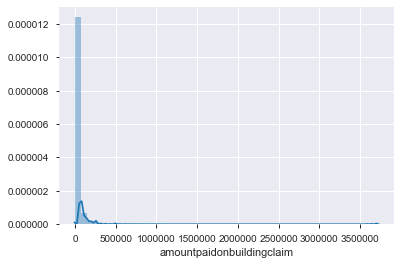

In [156]:
#the target is very right skewed
import seaborn as sns 
sns.distplot(sclaims['amountpaidonbuildingclaim'])

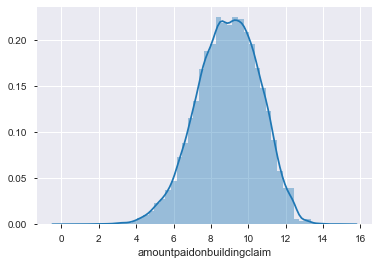

In [217]:
buildingclaim_log = np.log1p(sclaims['amountpaidonbuildingclaim'])
sclaims['amountpaidonbuildingclaim'] = buildingclaim_log
sns.distplot(sclaims['amountpaidonbuildingclaim'])

In [58]:
#sns.distplot(np.expm1(buildingclaim_log))
#leaving this here for later,
#how to reverse the log transform to interpret the results

In [158]:
sclaims['basefloodelevation'].max()

998.0

In [159]:
sclaims.dtypes

basefloodelevation                                   float64
basementenclosurecrawlspacetype                      float64
condominiumindicator                                  object
policycount                                          float64
countycode                                           float64
crsdiscount                                          float64
dateofloss                                    datetime64[ns]
elevatedbuildingindicator                             object
elevationdifference                                  float64
censustract                                          float64
floodzone                                             object
latitude                                             float64
locationofcontents                                    object
longitude                                            float64
numberoffloorsintheinsuredbuilding                   float64
obstructiontype                                       object
occupancytype           

In [160]:
sclaims['amountpaidonbuildingclaim'].max()

15.13007771181319

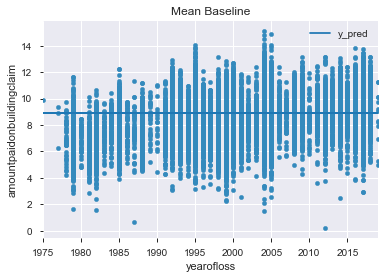

In [161]:
#Initial baseline

plot = sclaims.plot.scatter('yearofloss', 'amountpaidonbuildingclaim')

mean = sclaims['amountpaidonbuildingclaim'].mean()
sclaims['y_pred'] = mean
title = 'Mean Baseline'

sclaims.plot('yearofloss', 'y_pred', ax=plot, title=title)

In [162]:
mean

8.91385373683234

In [163]:
np.expm1(mean)

7433.255629734227

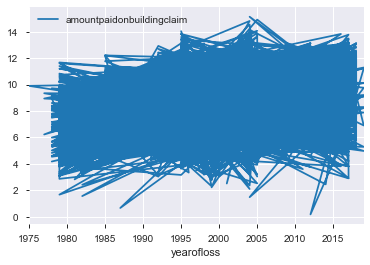

In [164]:
#yikes
sclaims.plot('yearofloss', 'amountpaidonbuildingclaim')

In [218]:
#Before I remove the rest of the columns I suspect aren't useful, I want to make a baseline
#model to compare against after they are removed

#since it is easy and I suspect the relationship is non-monotonic but leaning towards
#a linear relationship with a lot of outliers, I will start with ridge regression

#I originally did a train,val, test split randomly, went back and changed it by year

#train

a = (sclaims[sclaims['yearofloss'] < 1984])
b = (sclaims[(sclaims['yearofloss'] >= 1985)& (sclaims['yearofloss'] <= 1990)])
c = (sclaims[(sclaims['yearofloss'] >= 1991)& (sclaims['yearofloss'] <= 1995)])
d = (sclaims[(sclaims['yearofloss'] >= 1996)& (sclaims['yearofloss'] <= 2000)])

train1 = pd.merge(a, b, how='outer')
train2 = pd.merge(c,d, how='outer')
train= pd.concat([train1, train2])
print(train.shape)

#val

e =(sclaims[(sclaims['yearofloss'] >= 2001)& (sclaims['yearofloss'] <= 2005)])
f=(sclaims[(sclaims['yearofloss'] >= 2006)& (sclaims['yearofloss'] <= 2010)])

val = pd.merge(e,f, how='outer')
print(val.shape)

# test 

g = (sclaims[(sclaims['yearofloss'] >= 2011)& (sclaims['yearofloss'] <= 2015)])
h = (sclaims[(sclaims['yearofloss'] >= 2016)& (sclaims['yearofloss'] <= 2020)])

test = pd.merge(g, h, how='outer')
print(test.shape)

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

(14596, 26)
(8725, 26)
(6290, 26)


((14596, 23), (8725, 23), (6290,))

In [166]:
#before dropped columns

from sklearn.metrics import mean_absolute_error, r2_score
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.24904169839595247
Val score: 0.1988882630801957


In [167]:
coefficients = (pipeline.named_steps['ridgecv'].coef_)
sig = pd.Series(coefficients, features)
sig

basefloodelevation                           -0.025282
basementenclosurecrawlspacetype              -0.016251
condominiumindicator                          0.016882
policycount                                   0.076810
countycode                                    0.094365
crsdiscount                                  -0.191419
elevatedbuildingindicator                    -0.055903
elevationdifference                           0.180246
censustract                                   0.001644
floodzone                                     0.062943
latitude                                      0.150803
locationofcontents                           -0.025188
longitude                                    -0.163751
numberoffloorsintheinsuredbuilding           -0.002857
obstructiontype                              -0.003447
occupancytype                                 0.127624
originalconstructiondate                     -0.026707
amountpaidoncontentsclaim                     0.564080
amountpaid

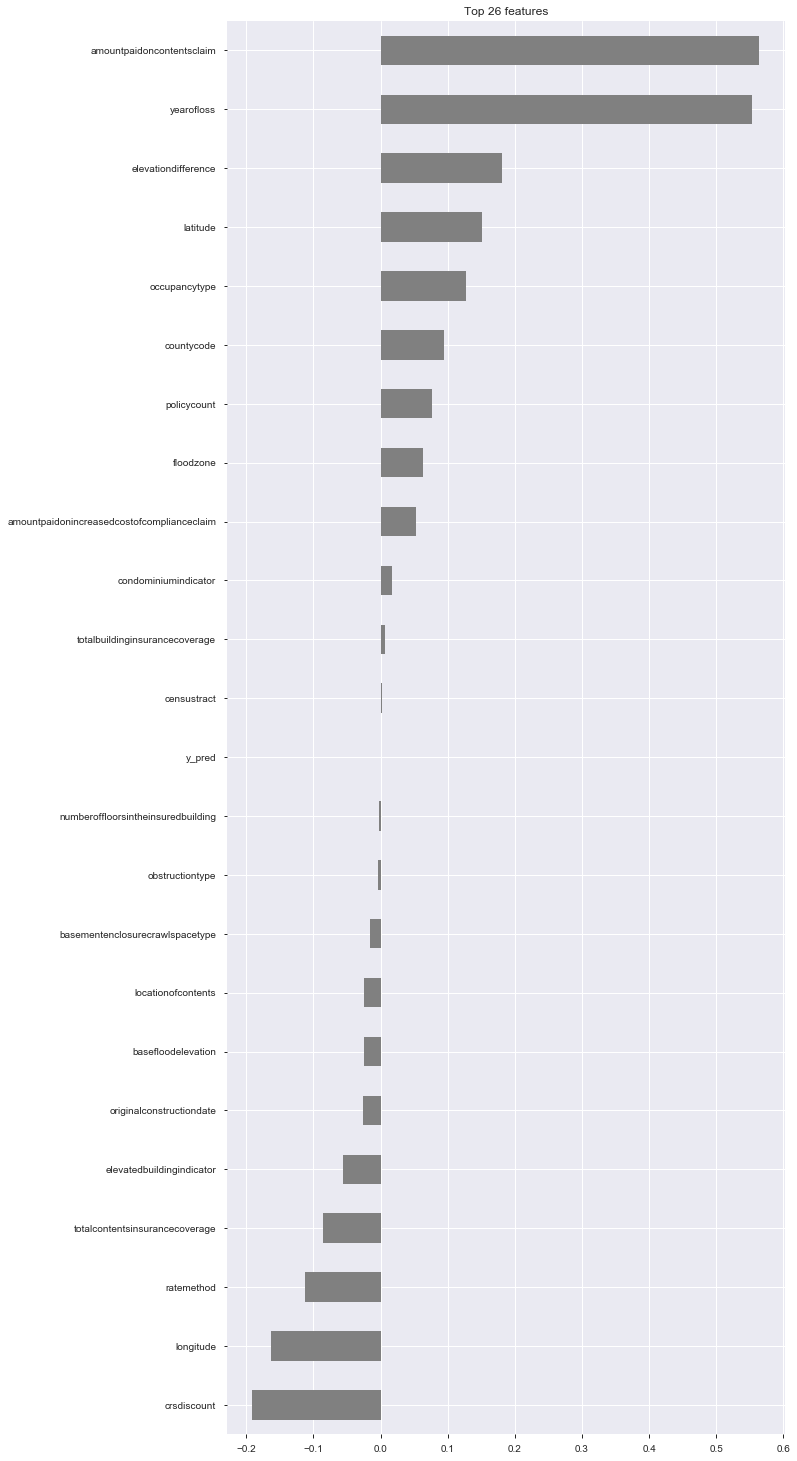

In [168]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,26))
plt.title(f'Top 26 features')
importances.sort_values()[-26:].plot.barh(color='grey')

#yearofloss in this model has the most influence, possibly supporting
#my hypothesis. it could also be overfitting to specific years with major natural disasters

#I wonder if total building insurance coverage is causing leakage. This may not be a good target,
#I may need to go back and choose the basefloodelevation

In [169]:
#better baseline

from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.9234421823446219
Val score: 0.14827454365071768


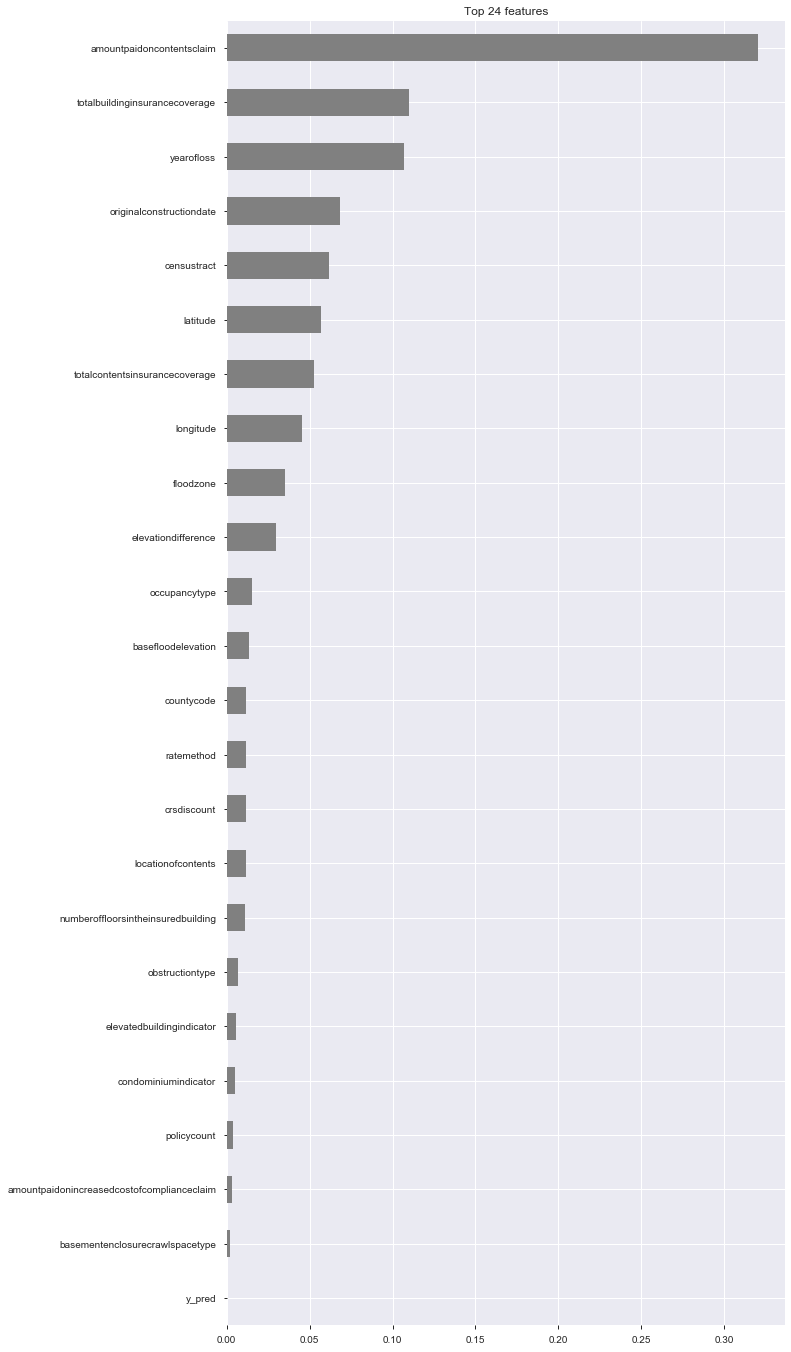

In [170]:
pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [72]:
#new day
#I think that the amountpaidoncontents is causing leakage, because if there is a lot
#paid on the building then there super likely damage to people's belongings too 

#possibly the insurance coverage as well, because of course if you take out more insurance
#then you can get a higher amount claimed

In [171]:
#rerunning model without the amountpaidcontents (probably leakage)

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((14596, 23), (8725, 23), (6290,))

In [172]:
#rerunning first graph without leakage
#lost 8%

alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.1604329818554472
Val score: 0.11931210024592252


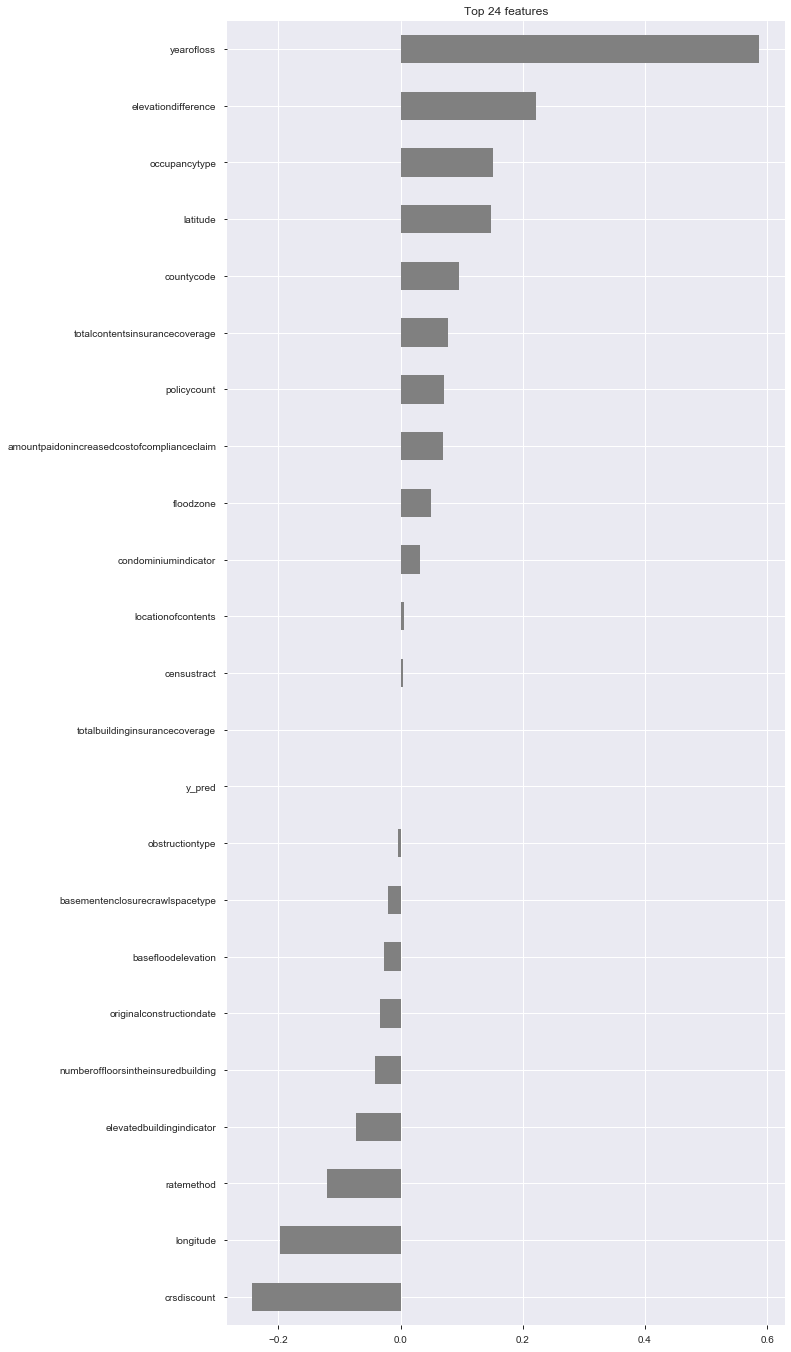

In [173]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [179]:
#score decreased tremendously, overfitting

from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.1915565608335621
Val score: -0.14491250220497753


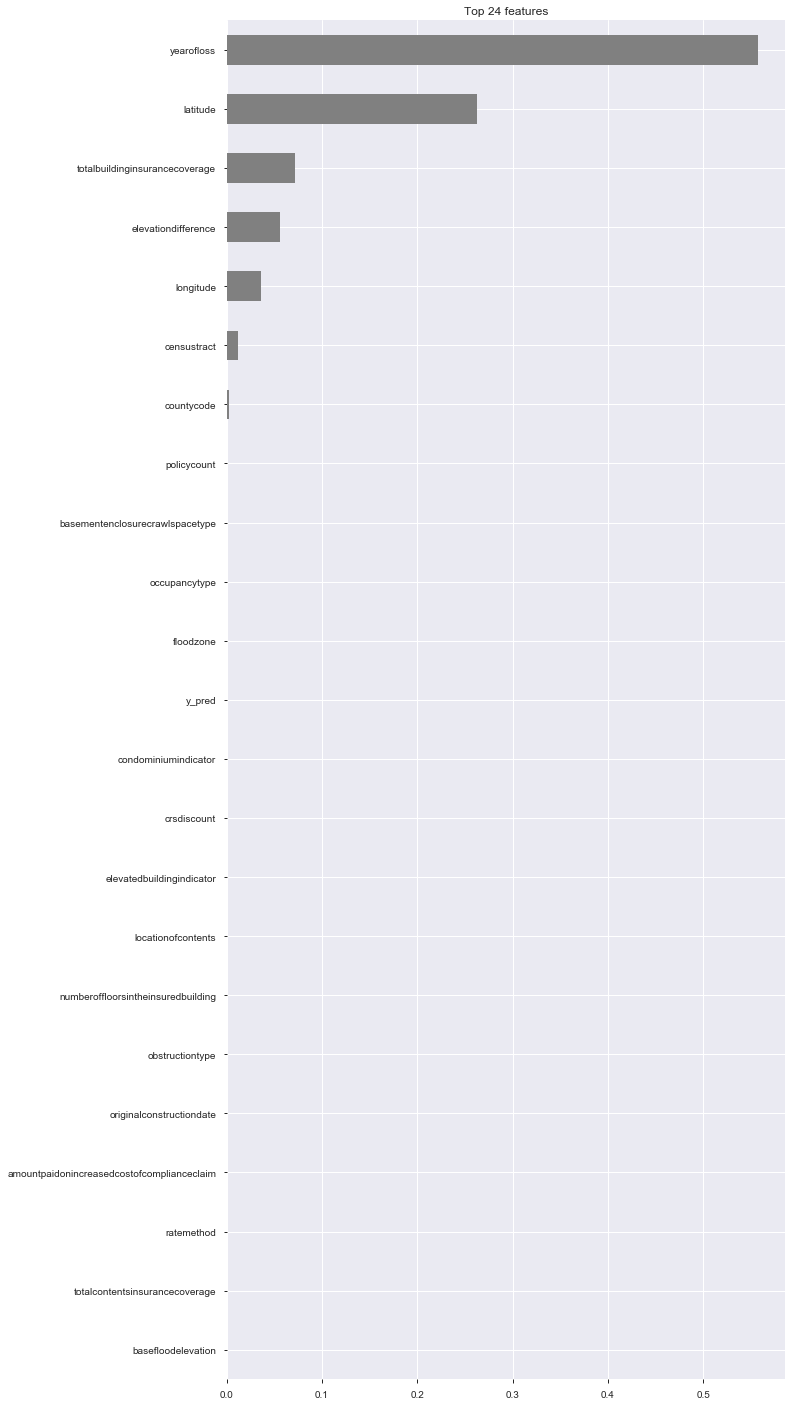

In [180]:
pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,25))
plt.title(f'Top 24 features')
importances.sort_values()[-25:].plot.barh(color='grey')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e1efceecc8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e1ef3a57c8>})

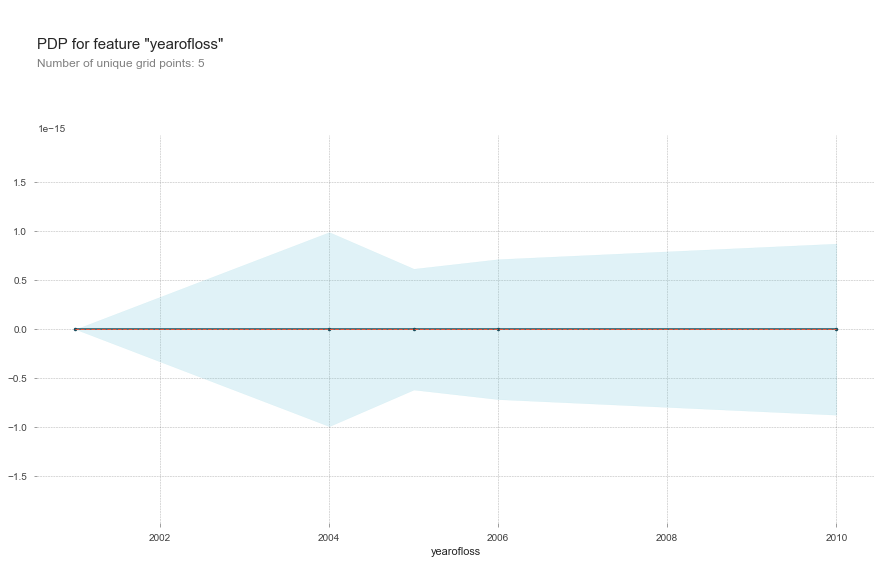

In [191]:
#I want to get a better look using partial dependence at our
#top importances 
from pdpbox.pdp import pdp_isolate, pdp_plot
plt.rcParams['figure.dpi'] = 72

feature= 'yearofloss'

isolated = pdp_isolate(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    feature = feature
)

pdp_plot(isolated, feature_name=feature)

In [79]:
#these notes are all from before I did the time based split :(

#I am quite excited to see that my hypothesis seems to be proving correct!
#beyond just the years with the really big storms,
#the importances of the year is steadily rising
#which means that the year is becoming increasingly more influencial as to whether or not
#it will flood. Which supports outside evidence of global warming. 

In [80]:
#can I engineer any new features to improve my score? before doing hyperparameter tuning

X_train.columns

Index(['basefloodelevation', 'basementenclosurecrawlspacetype',
       'condominiumindicator', 'policycount', 'countycode', 'crsdiscount',
       'elevatedbuildingindicator', 'elevationdifference', 'censustract',
       'floodzone', 'latitude', 'locationofcontents', 'longitude',
       'numberoffloorsintheinsuredbuilding', 'obstructiontype',
       'occupancytype', 'originalconstructiondate',
       'amountpaidonincreasedcostofcomplianceclaim', 'ratemethod', 'state',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'yearofloss', 'y_pred'],
      dtype='object')

In [81]:
#ideas for feature engineering

#basefloodelevation 
#elevation at which there is a 1% chance per year of flooding in feet from the elevation

#floodzone
#different catagories of flooding risk

#elevatedbuildingindicator
#as it sounds

#elevation difference
#Difference in feet between the elevation of the lowest floor used for rating or the 
#floodproofed elevation and the base flood elevation

#amountpaidonincreasedcostofcomplianceclaim
#$ given after severe flooding to relocate, rebuild, or raise house

#maybe state and floodzone could be combined?
#or basefloodelevation and floodzone

In [219]:
#(difference in lowest floor from elevation with 1% chance of flooding) + 
#(elevation with 1% chance of flooding) 
#this will give a single number as the number of feet=1% chance of flooding

sclaims['heightawayfrom_flooding'] = sclaims['elevationdifference'] + sclaims['basefloodelevation']

In [220]:
a = (sclaims[sclaims['yearofloss'] < 1984])
b = (sclaims[(sclaims['yearofloss'] >= 1985)& (sclaims['yearofloss'] <= 1990)])
c = (sclaims[(sclaims['yearofloss'] >= 1991)& (sclaims['yearofloss'] <= 1995)])
d = (sclaims[(sclaims['yearofloss'] >= 1996)& (sclaims['yearofloss'] <= 2000)])

train1 = pd.merge(a, b, how='outer')
train2 = pd.merge(c,d, how='outer')
train= pd.concat([train1, train2])
print(train.shape)

#val

e =(sclaims[(sclaims['yearofloss'] >= 2001)& (sclaims['yearofloss'] <= 2005)])
f=(sclaims[(sclaims['yearofloss'] >= 2006)& (sclaims['yearofloss'] <= 2010)])

val = pd.merge(e,f, how='outer')
print(val.shape)

# test 

g = (sclaims[(sclaims['yearofloss'] >= 2011)& (sclaims['yearofloss'] <= 2015)])
h = (sclaims[(sclaims['yearofloss'] >= 2016)& (sclaims['yearofloss'] <= 2020)])

test = pd.merge(g, h, how='outer')
print(test.shape)

(14596, 27)
(8725, 27)
(6290, 27)


In [221]:
target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((14596, 23), (8725, 23), (6290,))

In [185]:
#my score didn't change

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.19155649477529435
Val score: -0.14491250220497798


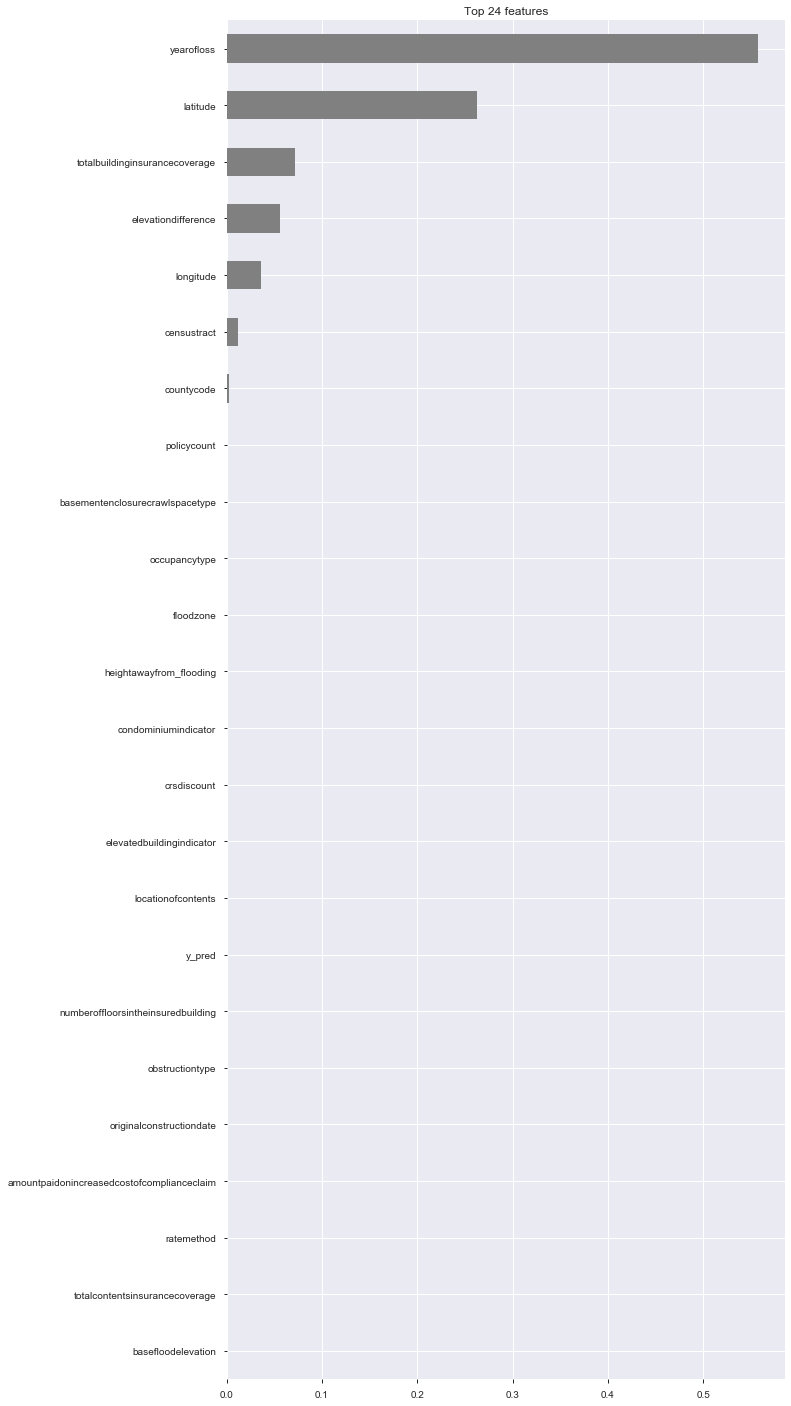

In [186]:
#lets see what little influence this new feature had
#17th on the list

pipe = pipeline.named_steps['randomforestregressor']
importances = pd.Series(pipe.feature_importances_, X_train.columns)

plt.figure(figsize=(10,25))
plt.title(f'Top 24 features')
importances.sort_values()[-25:].plot.barh(color='grey')

In [222]:
#I think that totalbuildinginsurancecoverage is causing leakage
#as low as my score is, I need to remove that too

#then I will try dropping year of loss

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim',
        'totalbuildinginsurancecoverage']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((14596, 22), (8725, 22), (6290,))

In [195]:
#last score for ridge was 11%
#slight increase
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.16055354256702858
Val score: 0.11964746904614654


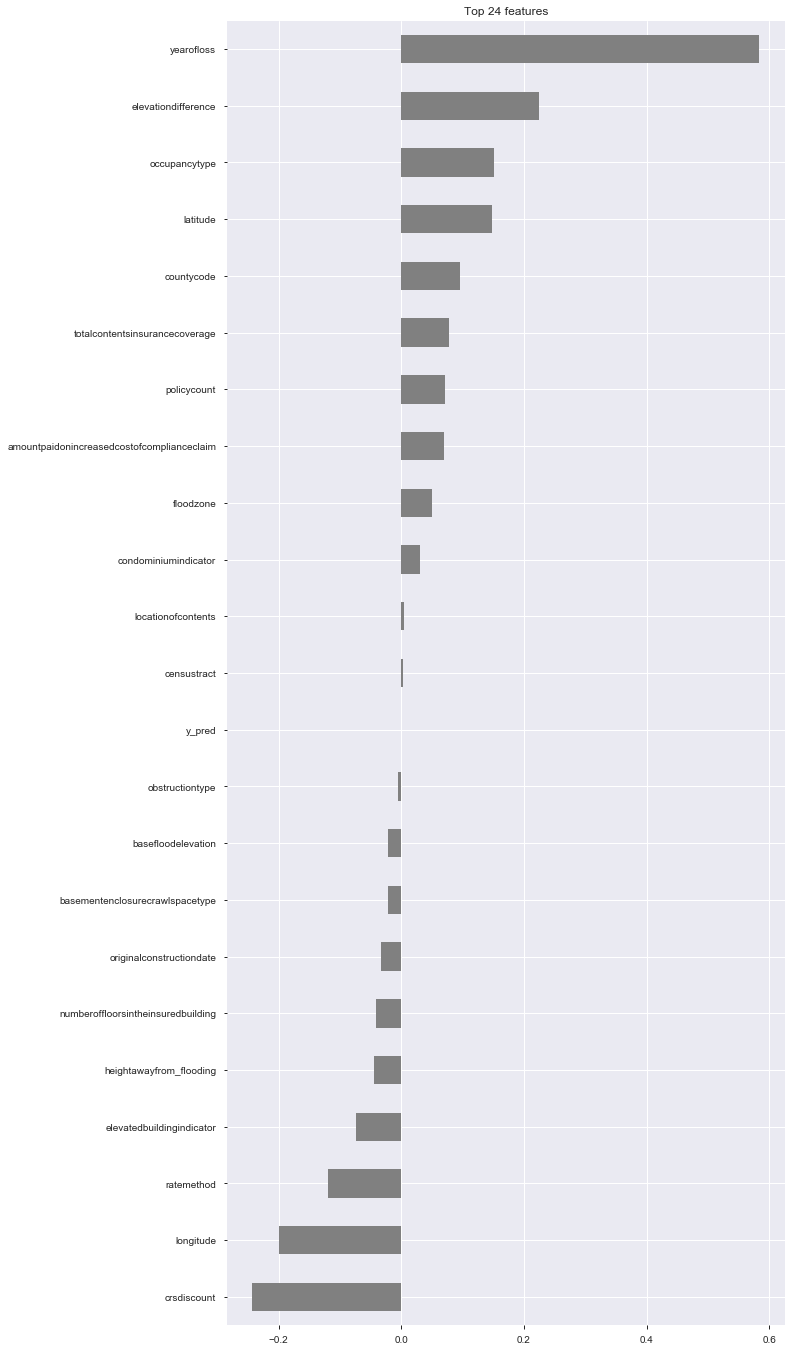

In [196]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [197]:
#last score for random forest was -14%
#yikes it got worse

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.1804848680241221
Val score: -0.19761941879706102


In [198]:
#okay time to remove year of loss..... 

#I removed year of loss and it went extremely poorly
#I am not doing it for now so my notebook will run top to bottom

target = 'amountpaidonbuildingclaim'
dates = ['dateofloss', 'originalnbdate', 'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim',
        'totalbuildinginsurancecoverage']
features = sclaims.columns.drop(dates)

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train.shape, X_val.shape, y_test.shape

((14596, 22), (8725, 22), (6290,))

In [199]:
#last score was 12% lets see
#no, I must keep this
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.09945933544952901
Val score: -0.09572389461555275


In [225]:
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RidgeCV(alphas=alphas, normalize=True )
    )

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.1605535425670287
Val score: 0.1196474690461633


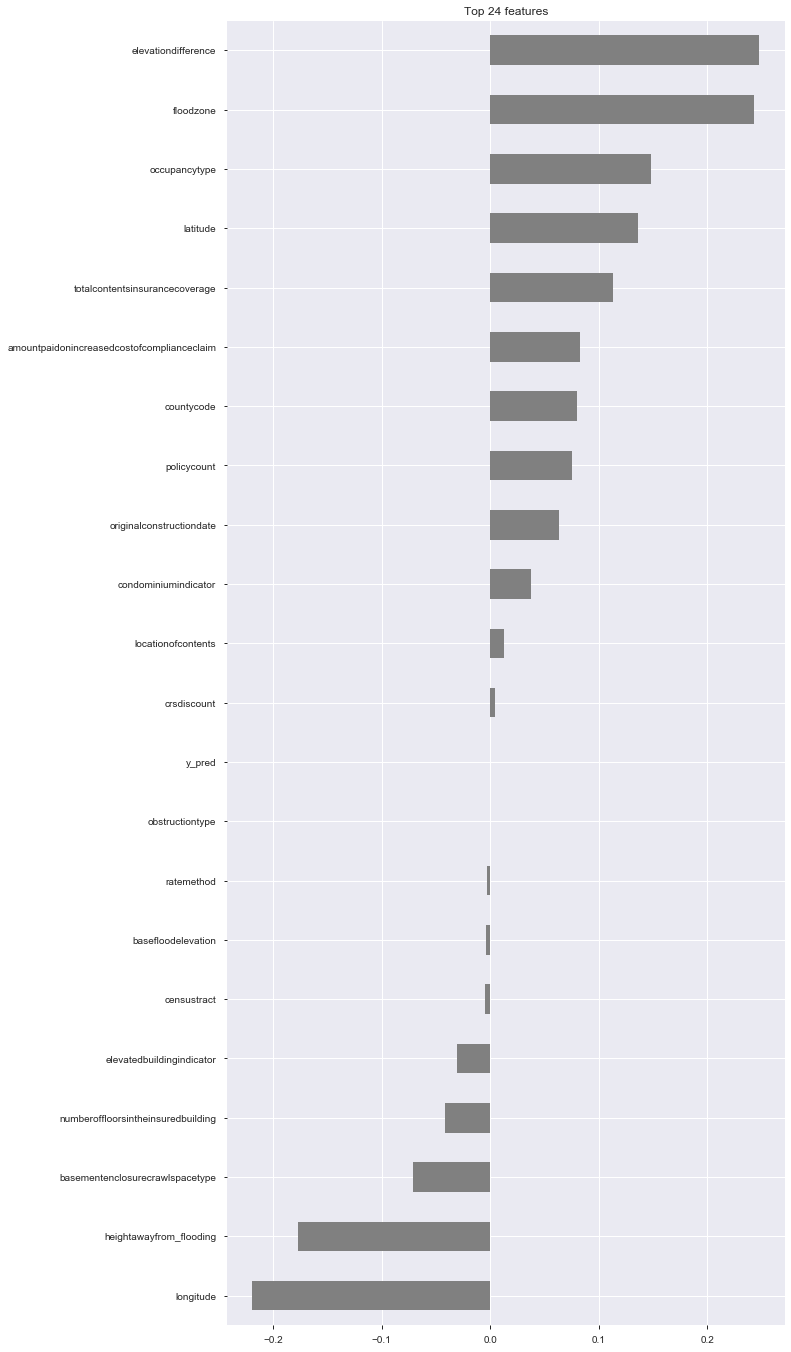

In [204]:
pipe = pipeline.named_steps['ridgecv'].coef_
importances = pd.Series(pipe, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,24))
plt.title(f'Top 24 features')
importances.sort_values()[-24:].plot.barh(color='grey')

In [201]:
#way worse
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42,
                         max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.15495024881054298
Val score: -0.3603060723461362


In [187]:
#will try cross validation
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=42)
)


param_distributions = {
    'simpleimputer__strategy': ['mean', 'median', 'most_frequent'],
    'randomforestregressor__min_samples_leaf':randint(1,10),
    'randomforestregressor__n_estimators': randint(50, 500),
    'randomforestregressor__max_depth': [5, 10, 15, 20, None],
    'randomforestregressor__max_features': uniform(0, 1)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions= param_distributions,
    n_iter=20,
    cv = 3,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)


search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=None,
                                                             drop_invariant=False,
                                                             handle_missing='value',
                                                             handle_unknown='value',
                                                             mapping=None,
                                                             return_df=True,
                                                             verbose=0)),
                                             ('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             wi

In [188]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation MAE', -search.best_score_)

Best hyperparameters {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.9699488827074279, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__n_estimators': 258, 'simpleimputer__strategy': 'median'}
Cross-validation MAE 1.0645426047537103


In [189]:
#first CV best params
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(n_jobs=-1, n_estimators=258, random_state=42,
                         max_depth= 15, min_samples_leaf=3, max_features=.96)
)


pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.6648589162447789
Val score: -0.38963787492562885


In [224]:
#second CV best params

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(n_jobs=-1, n_estimators=50, random_state=42,
                         max_depth=8)
)


pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

Train Accuracy: 0.3722232403758492
Val score: -0.41290136219733276


In [223]:
from xgboost import XGBRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

[15:43:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Accuracy: 0.3315087603340048
Val score: -0.2256626876818493


In [226]:
#so..........
#everything sucks
#it may just be that the data can't procure this 
#but for sure, I am going to stop trying with the tree-based models
#feature engineering will probably give me the biggest boost
#second to that is hypertuning the parameters for ridgeCV
#das the plan

sclaims.columns

Index(['basefloodelevation', 'basementenclosurecrawlspacetype',
       'condominiumindicator', 'policycount', 'countycode', 'crsdiscount',
       'dateofloss', 'elevatedbuildingindicator', 'elevationdifference',
       'censustract', 'floodzone', 'latitude', 'locationofcontents',
       'longitude', 'numberoffloorsintheinsuredbuilding', 'obstructiontype',
       'occupancytype', 'originalconstructiondate', 'originalnbdate',
       'amountpaidonbuildingclaim', 'amountpaidoncontentsclaim',
       'amountpaidonincreasedcostofcomplianceclaim', 'ratemethod',
       'totalbuildinginsurancecoverage', 'totalcontentsinsurancecoverage',
       'yearofloss', 'heightawayfrom_flooding'],
      dtype='object')

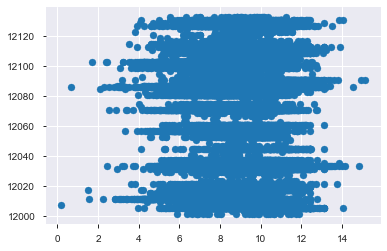

In [239]:
plt.scatter(sclaims['amountpaidonbuildingclaim'], sclaims['countycode'])

In [2]:
#well, this model is pointless

from sklearn.tree import DecisionTreeRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(strategy='mean'),
    DecisionTreeRegressor(max_depth=1, random_state=42)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Val score:', pipeline.score(X_val, y_val))

NameError: name 'make_pipeline' is not defined

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None, 
                           max_depth=3, #this stops the tree viz from going on and on
                           feature_names=encoded_columns,
                           class_names=model.classes_, 
                           impurity=False, 
                           filled=True, 
                           proportion=True, 
                           rounded=True)   
display(graphviz.Source(dot_data))

In [1]:
import graphviz 
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeregressor']
encoder = pipeline.named_steps['ordinalencoder']
scaler = pipeline.named_steps['standardscaler']
imputer = pipeline.named_steps['simpleimputer']

encoded = encoder.transform(X_val).columns
scaled = scaler.transform(encoded)
imputed = imputer.transform(scaled)

NameError: name 'pipeline' is not defined

In [ ]:
#check for inflation

#this isn't a perfect measure but, I wanted to see if the 
#linear model is just getting its results due to inflation
#since naturally, there has been some since 1979.

#this is the website I used 
#https://www.in2013dollars.com/us/inflation/1978?endYear=2019&amount=1051

#putting in the figures below you can see that that amount in 1979
#would be about $4000 dollars today, which is quite different from the $26,128
#average payout

#I cross referenced that with this website and got a very similar answer
#https://smartasset.com/investing/inflation-calculator#K6i7zN8381

In [274]:
from_1979 = sclaims[(sclaims['yearofloss'] == 1979)]
from_1979mean = from_1979['amountpaidonbuildingclaim'].mean()
(np.expm1(from_1979mean))

1025.210444233209

In [271]:
from_2018 = sclaims[(sclaims['yearofloss'] == 2018)]
from_2018mean = from_2018['amountpaidonbuildingclaim'].mean()
(np.expm1(from_2018mean))

26128.425912379502